In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read in the training set file

train_raw = pd.read_csv('train.csv')
train_raw.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
train_raw.info()
# there are 370 features to predict the target


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [88]:
train_raw.groupby('TARGET').size() 

TARGET
0    73012
1     3008
dtype: int64

The "TARGET" column is the variable to predict. It equals 1 for unsatisfied customers and 0 for satisfied customers. We don't have information on what each feature variable actually means or refers to. There are 3008 out of 73012 dissatisfied customers, or
only 4%.<p>
This problem is almost an outlier identification problem, as the dissatisfied customers could be considered outliers

In [69]:
summary = train_raw.describe() # descriptive statistics of all variables
summary.iloc[:,20:31]

,ind_var1_0,ind_var1,ind_var2_0,ind_var2,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0
count,76020.000000,76020.000000,76020.0,76020.0,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000
mean,0.011458,0.003762,0.0,0.0,0.958024,0.663760,0.000105,0.000026,0.032833,0.028598,0.067522
std,0.106425,0.061221,0.0,0.0,0.200535,0.472425,0.010258,0.005129,0.178202,0.166674,0.250925
min,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It looks like all of the predictor variables are continuous. Some of them have hidden NA values, such as "-999999" as a minimum value of var3. It could also be that certain categorical varables were mistaken as continuous. If a variable has only a handful of unique vales and they are all integers ordered in a sequence, it would be very likely to be a categorical or ordered variable.

In [15]:
# apply a function to each column that counts the total number of unique values
var_uniq = train_raw.apply(lambda x : np.unique(x).size, axis = 0)
var_uniq[:50]

ID                         76020
var3                         208
var15                        100
imp_ent_var16_ult1           596
imp_op_var39_comer_ult1     7551
imp_op_var39_comer_ult3     9099
imp_op_var40_comer_ult1      293
imp_op_var40_comer_ult3      346
imp_op_var40_efect_ult1       23
imp_op_var40_efect_ult3       29
imp_op_var40_ult1            224
imp_op_var41_comer_ult1     7421
imp_op_var41_comer_ult3     8961
imp_op_var41_efect_ult1      331
imp_op_var41_efect_ult3      454
imp_op_var41_ult1           8032
imp_op_var39_efect_ult1      336
imp_op_var39_efect_ult3      462
imp_op_var39_ult1           8149
imp_sal_var16_ult1            66
ind_var1_0                     2
ind_var1                       2
ind_var2_0                     1
ind_var2                       1
ind_var5_0                     2
ind_var5                       2
ind_var6_0                     2
ind_var6                       2
ind_var8_0                     2
ind_var8                       2
ind_var12_

First, check the histogram to see the distribution of unique value size among feature variables.
<ul>
    <li>When there are over 100 unique values, it is very likely that the variabel is continuous.</li>
  <li>When there are 2 unique values, it is very likely a binary or dummy variable.</li>
  <li>When there is only 1 unique value, this variable could be discarded.</li>
</ul>
 

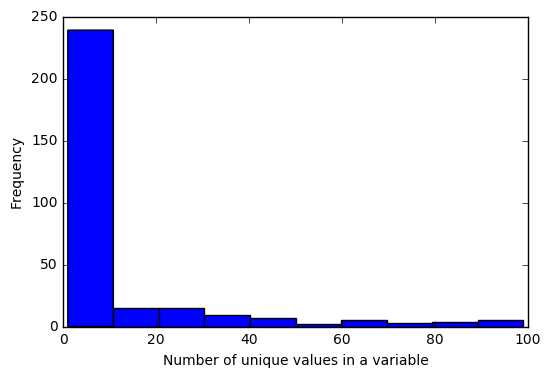

In [19]:
plt.hist(var_uniq[var_uniq<100])
plt.xlabel('Number of unique values in a variable')
plt.ylabel('Frequency')
plt.show()

It looks like there are about 65% of the features with less than 10 unique values. Let's take a closer look at variables with 10 unique values or less.

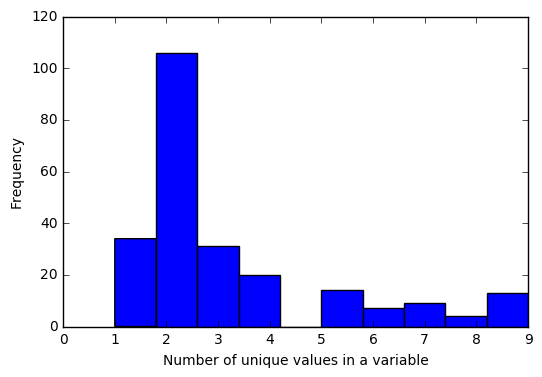

In [20]:
plt.hist(var_uniq[var_uniq<10])
plt.xlabel('Number of unique values in a variable')
plt.ylabel('Frequency')
plt.show()

In [27]:
# print out the unique values of variables that had only 2 unique values
train_raw.loc[:,var_uniq==2].apply(lambda x: print(np.unique(x)), axis= 0)

[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  1.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[ 0.  3.]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.00000000e+00   1.00000000e+10]
[  0.000

ind_var1_0                       None
ind_var1                         None
ind_var5_0                       None
ind_var5                         None
ind_var6_0                       None
ind_var6                         None
ind_var8_0                       None
ind_var8                         None
ind_var12_0                      None
ind_var12                        None
ind_var13_0                      None
ind_var13_corto_0                None
ind_var13_corto                  None
ind_var13_largo_0                None
ind_var13_largo                  None
ind_var13_medio_0                None
ind_var13_medio                  None
ind_var13                        None
ind_var14_0                      None
ind_var14                        None
ind_var17_0                      None
ind_var17                        None
ind_var18_0                      None
ind_var18                        None
ind_var19                        None
ind_var20_0                      None
ind_var20   

All those features that have 2 unique values have 0 as one of the two values. Some features had 1 as the other value, but others have ranging from 3 to 145.2, 1200, 12027.15. Those features would have a misleading mean and standard deviation value. Their scale may also misleading our modele results. 
Even if they were indeed continuous variables, they could be converted into dummy variables encoded as {1: having a value of 'X', 0: not having a value of 'x'}.

In [32]:
muted = train_raw.copy() # make a copy of the original dataset before making changes

In [35]:
muted.ix[:, var_uniq == 2] = muted.ix[:, var_uniq == 2].where(
    muted.ix[:, var_uniq == 2] > 1, 1) 
# repalce values that are greater than 1 in the binary variables as 1

In [36]:
muted.ix[:,var_uniq == 2].head()

,ind_var1_0,ind_var1,ind_var5_0,ind_var5,ind_var6_0,ind_var6,ind_var8_0,ind_var8,ind_var12_0,ind_var12,...,num_meses_var13_medio_ult3,num_reemb_var13_ult1,num_reemb_var17_hace3,num_reemb_var33_ult1,num_trasp_var17_in_ult1,num_trasp_var17_out_ult1,num_trasp_var33_in_hace3,num_trasp_var33_out_ult1,saldo_medio_var29_hace3,TARGET
0,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1
2,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1
3,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1.0,1


In [74]:
# print out the unique values of variables that had only 2 unique values
train_raw.loc[:,var_uniq==3].apply(lambda x: print(np.unique(x)), axis= 0)

[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[     0.   11976.6  19531.8]
[     0.   9000.  30000.]
[       0.   300000.  3000000.]
[     0.   11976.6  19531.8]
[     0.  15000.  36000.]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[ -1.00000000e+00   0.00000000e+00   1.00000000e+10]
[     0.     1883.22  15691.8 ]
[    0.     276.24  1096.02]
[     0.    45741.48  96781.44]
[ 0.  3.  6.]
[ 0.  1.  2.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[ 0.  3.  6.]
[    0.    5586.21  7741.95]
[     0.   9000.  30000.]
[     0.     7293.12  18870.99]


num_var1_0                       None
num_var1                         None
num_var8_0                       None
num_var13_corto_0                None
num_var13_corto                  None
num_var24                        None
num_var33                        None
num_var40_0                      None
num_var44_0                      None
saldo_var6                       None
saldo_var13_medio                None
saldo_var18                      None
saldo_var29                      None
saldo_var34                      None
delta_imp_reemb_var17_1y3        None
delta_imp_trasp_var17_in_1y3     None
delta_imp_trasp_var33_in_1y3     None
delta_num_reemb_var17_1y3        None
delta_num_trasp_var17_in_1y3     None
delta_num_trasp_var33_in_1y3     None
imp_amort_var18_ult1             None
imp_amort_var34_ult1             None
imp_trasp_var17_in_hace3         None
num_aport_var33_ult1             None
num_meses_var29_ult3             None
num_trasp_var17_in_hace3         None
num_trasp_va

In [71]:
# print out the unique values of variables that had only 3 to 100 unique values
temp_3_10 = train_raw.loc[:,(var_uniq>2) & (var_uniq <101)]
for i in range(temp_3_10.shape[1]):
    print(list(temp_3_10.columns)[i], np.unique(temp_3_10.iloc[:,i]))

var15 [  5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20  21  22
  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 104 105]
imp_op_var40_efect_ult1 [    0.      60.      74.28    87.9    120.     150.     180.     210.
   270.     300.     330.     420.     450.     600.     750.     870.
   900.     930.    1020.    1200.    1710.    1800.    6600.  ]
imp_op_var40_efect_ult3 [    0.      60.      74.28    87.9    120.     150.     180.     210.
   270.     300.     306.69   330.     420.     450.     600.     720.
   750.     870.     900.     960.    1020.    1200.    1621.26  1650.
  1710.    1800.    3000.    3810.    6600.  ]
imp_sal_var16_ult1 [  0.00000000e+00   1.50000000e+00   1.50000000e+01  

<ul>
<li>It seems that many of those variables are ordered categorical variables, with '99' representing missing values, such as 'var36': [ 0  1  2  3 99]. </li>
<li> Some features are evenly spread but with large values. It is again hard to interpret like
<p>saldo_var18 [      0  300000 3000000]</p>
saldo_var29 [     0.   11976.6  19531.8]</li>
<li>It's much harder to make sense of some vairables with a wide range like 'num_var12_0': [  0   3   6   9  15 111]. And it's unclear whether '111' was an outlier or not</li>
<li> Quite a few of the 'delta' variables have values like 'delta_imp_reemb_var17_1y3': [        -1          0 9999999999]</li>
<li>The relationships between variables with almost the same name but different ending could be very important. <p>For instance, </p>
     num_var13_0: [ 0  3  6  9 12 15 18]
     <p>num_var13_corto_0: [0 3 6]</p>
     <p>num_var13_corto: [0 3 6]</p>
     <p>num_var13_largo_0: [ 0  3  6  9 12 15 18]</p>
     <p>num_var13_largo: [ 0  3  6  9 12 15 18]</p>
    <p></p>
</li>
<li> It could be that the features with '_0' have more values than the ones without, like <p>num_var17_0: [ 0  3  6  9 12 15 18 21 24 27 36]</p>
num_var17: [ 0  3  6  9 12 15 18 21 27]
<p> num_var33_0: [ 0  3  6 12]</p>
num_var33: [0 3 6]
</ul>

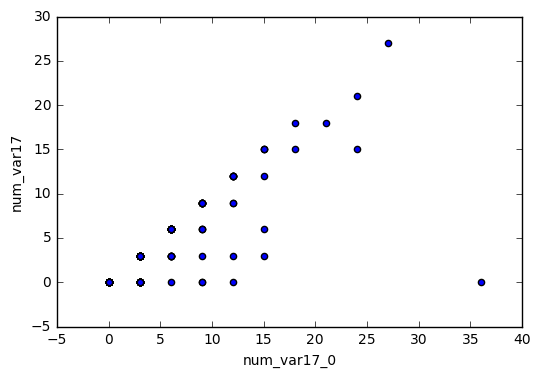

In [77]:
plt.scatter(train_raw.num_var17_0, train_raw.num_var17),
plt.xlabel('num_var17_0')
plt.ylabel('num_var17')
plt.show()

In [80]:
train_raw.groupby(['num_var17_0','num_var17']).size()
# compare the diffrences of two features

num_var17_0  num_var17
0            0            75883
3            0               22
             3               46
6            0                1
             3                6
             6               24
9            0                2
             3                1
             6                3
             9                9
12           0                1
             3                1
             9                2
             12               6
15           3                1
             6                1
             12               1
             15               3
18           15               1
             18               1
21           18               1
24           15               1
             21               1
27           27               1
36           0                1
dtype: int64

According to the scatter plot above, it seems that even though those two variables are highly correlated, there are still many observations with different values.
And the table shows that the vast majority of observations have "0" in both two features.
<p></p>
'0' is the minimum value of most variables. If the vast majority of a variable has zero value, it may be that a survey question asked whether a custom had a certain experience x, and 0 would imply that he/she didn't have it, and the other values would imply a customers' satisfaction level of their experience.

In [86]:
summary.loc['min',:]

ID                                    1.00
var3                            -999999.00
var15                                 5.00
imp_ent_var16_ult1                    0.00
imp_op_var39_comer_ult1               0.00
imp_op_var39_comer_ult3               0.00
imp_op_var40_comer_ult1               0.00
imp_op_var40_comer_ult3               0.00
imp_op_var40_efect_ult1               0.00
imp_op_var40_efect_ult3               0.00
imp_op_var40_ult1                     0.00
imp_op_var41_comer_ult1               0.00
imp_op_var41_comer_ult3               0.00
imp_op_var41_efect_ult1               0.00
imp_op_var41_efect_ult3               0.00
imp_op_var41_ult1                     0.00
imp_op_var39_efect_ult1               0.00
imp_op_var39_efect_ult3               0.00
imp_op_var39_ult1                     0.00
imp_sal_var16_ult1                    0.00
ind_var1_0                            0.00
ind_var1                              0.00
ind_var2_0                            0.00
ind_var2   